Case study #03 - Correlation and Regression by Jayaram K

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data to Python environment

In [4]:
adv_data = pd.read_csv('Add_sales_data_2018.csv')

In [5]:
# To check first 5 rows of Data frame

In [54]:
adv_data.head(5)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [7]:
# To check the Data types of the Columns

In [8]:
adv_data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [9]:
# To check any null values present in the Data frame

In [10]:
adv_data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

 - No Null Values present in the data. We can continue with the same Data frame for calculations.

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

A commonly used method for finding relationship is with a Correlation, which describes how close to linear fashion one variable changes as related to changes in another variable.The method to find any relationship between different variables of data is to find the Corelation among them. 
- The correlation coefficient,the result, which has a value that must fall between -1.0 and +1.0.

In [11]:
# We use corr() to find the pairwise correlation of all columns in the dataframe.  
# In this case, correlation between the amount spent for advertising through five different companies and profit generated.

In [12]:
corr_matrix = adv_data.corr()
corr_matrix

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


In [13]:
# We can also plot a graph, Heatmap to get information about the correlation.

Note: From the above table we can see that 0.976716 is the smallest value, so we set vmin to .976 and vmax to 1, which is the max for correlation.

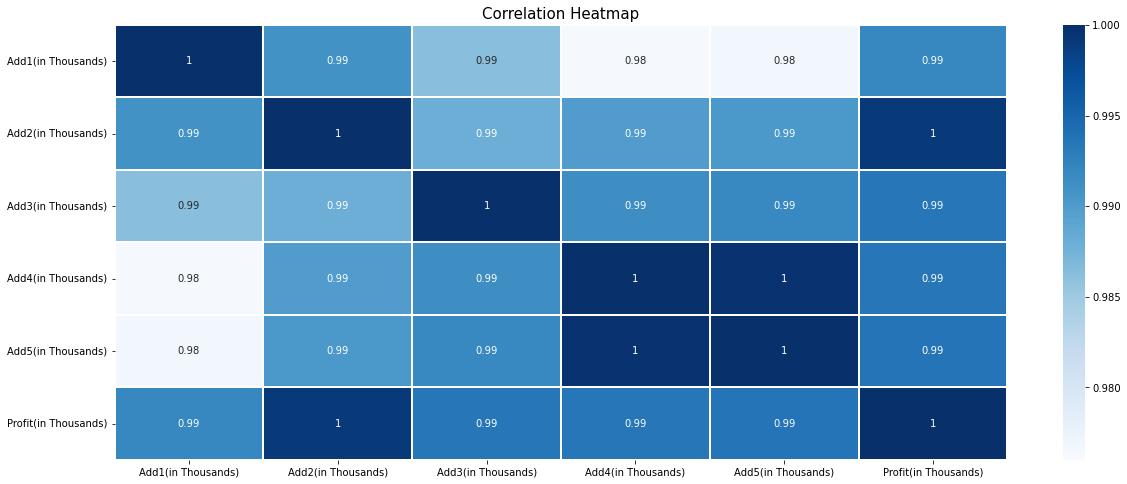

In [14]:
plt.subplots(figsize=(20,8))
sns.heatmap(data =corr_matrix , vmin = .976, vmax = 1, annot = True, linewidth = .2, cmap='Blues')
plt.title('Correlation Heatmap',fontsize =15)
plt.show()

When observing the table or graph we can find that all variables (Add1,...,Add5 and Profit), are highly correlated. All values are near to 1 which indicate a high correlation or relation among them.

- So we can say that there is a strong relationship between the amount spent for advertising through five different companies and profit generated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it

- Regression models predict a value of the Y variable(dependent or target variable) given known values of the X variables(independent or predictor variables).

In [15]:
adv_data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [16]:
# Refine the DataFrame with the columns that we need to build the regression model

In [67]:
ref_data = adv_data.select_dtypes(include=['float64']) #Select columns with datatype folat64
ref_data.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


In [68]:
# Define dependent(y) and independent(X) variables 

- Here we select Profit(in Thousands) as our dependent(y) variable or Target and Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands) and Add5(in Thousands) as our independent(X) variables. 

In [19]:
y = ref_data['Profit(in Thousands)']
X= ref_data.drop(['Profit(in Thousands)'],axis=1)

Now we split the DataFrame into Test and Train data

In [20]:
#From the sklearn module we will use the train_test_split() method to split the dataset.

In [21]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = .25)

Split the data frame into Train data as, X_train & y_train and to Test data as, X_test & y_test.
We spilt them in 75% to Train and 25% to Test by setting test_size = .25
Take random_state = 42 to get the same data everytime.

In [23]:
# From the sklearn module we will use the LinearRegression() method to create a linear regression object.

In [24]:
# Importing necessary libraries
from sklearn import linear_model

In [25]:
lr = linear_model.LinearRegression() #Create Linear Regression model

In [26]:
model = lr.fit(X_train,y_train)  #Train Linear Regression model(lr) with our Train data(X_train,y_train)

In [27]:
predictions = model.predict(X_test) # Make prediction about Profit by using the Test data(X_test)

In [69]:
# Now we Check whether the Regression model is fit to predict

We can use the metric R-Square to evaluate the model performance

In [29]:
# Importing necessary libraries
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print('R-Squard score for this model is;', r2)

R-Squard score for this model is; 1.0


R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination.
- R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
- An R-squared of 1 indicates that the regression predictions perfectly fit the data.

A value of 1.0 indicates a perfect fit or 100% of the variation in y can be explained by the x-variables, and is thus a highly reliable model for future forecasts


In [30]:
# Now we find the Mean Squared Error(MSE), another metrics to check our Regression model

The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. Minimizing MSE is the key criterion(close to zero).

In [34]:
# Importing necessary libraries
from sklearn.metrics import mean_squared_error

In [70]:
mse = mean_squared_error(y_test,predictions)
print('The MSE is:',mse)

The MSE is: 8.11273293080854e-25


- We see that it is very less, alomost equal to zero. That means our Regression model or line is the best fit.

In [41]:
# A line graph to illustrate the actual and predicted values

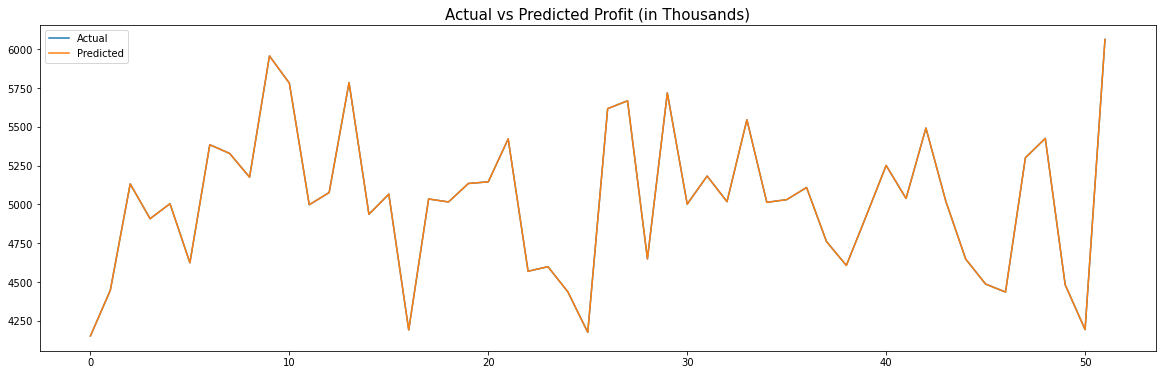

In [40]:
evaluate = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
df = evaluate[['Actual','Predicted']]
df.plot(figsize=(20,6))
plt.title('Actual vs Predicted Profit (in Thousands)',fontsize =15)
plt.show()

We can see both the lines(Actual and Predicted) are almost equal and cannot find any diffrences.

In [ ]:
# Intercept and Slope coefficients of regression liine

In [71]:
print('y-intercept:',model.intercept_)
print('Slope coefficients:', model.coef_)

y-intercept: 0.0
Slope coefficients: [ 1.   12.38  3.5   1.    0.9 ]


With this we can define the regression line for this model

Profit = 0 + [1.0 * (Add1)] + [12.38 * (Add2)] + [3.5 * (Add3)] + [1.0 * (Add4)] +  [0.9 * (Add5)]

Conclusions:

1. R-squared and Mean Squared Error for our model is very good.So the predictions will be accurate.
2. From the Regression line we can find Add2 is the biggest contributor for generating profit. 
    Ex: If we give value 1 to Add2 and 0 to Add1,Add3,Add4 & Add5, it gives a profit of 12.38. And we consider the same for other then the profit is 1.,3.5,1.0 and 0.9 respectively.
3. Even when we add others still it not reaches the profit generated by Add2.
4. Hence, the organization can spend more on Add2 company and even remove rest of the add companies because the profit generated by Add2 is almost doble when compared to other 4. 

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

        Add1(in Thousands): 290
        Add2(in Thousands): 312
        Add3(in Thousands): 309
        Add4(in Thousands): 298
        Add5(in Thousands): 320

In [42]:
#We can calculate the profit by simply giving the values to the regression line equation;

Equation; Profit  =  0 + [1.0 * (Add1)] + [12.38 * (Add2)] + [3.5 * (Add3)] + [1.0 * (Add4)] + [0.9 * (Add5)]

In [55]:
profit = (1.*290)  + (12.38*312) + (3.5*309) +  (1. *298)+   (0.9*320)
print('The estimated Profit generated by the company:',profit,"(in Thousands)")

The estimated Profit generated by the company: 5820.06 (in Thousands)


In [56]:
#using predict() function, this function enables us to predict the new Target values(Profit) on the basis of the trained model.

In [57]:
values = [[290, 312,309,298,320]]
columns = ['Add1(in Thousands)', 'Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']
new_X = pd.DataFrame(values,columns = columns)
new_y = model.predict(new_X)

In [66]:
print('The estimated Profit generated by the company:',"%.2f"% new_y[0],"(in Thousands)")

The estimated Profit generated by the company: 5820.06 (in Thousands)


Thank You.